In [1]:
import xarray as xr
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tqdm
import datetime

In [35]:

import math 
def convert_gpstime(gpstime, date):
    def frmt(decimal_time): # You can rewrite it with 'while' if you wish
        hours = int(decimal_time)#
        minutes = np.round(decimal_time - hours, 4)*60
        seconds = np.round(minutes - int(minutes), 4)*60
        HMS_time = f'{hours}:{int(minutes)}:{int(seconds)}'#"%s:%s:%f"%(hours, int(minutes), int(seconds))
        return HMS_time
    list_HMS_time = list(map(frmt, gpstime))
    list_YMD_HMS = list(map(lambda orig_string: date+' '+orig_string, list_HMS_time))
    pd_YMD_HMS = pd.to_datetime(list_YMD_HMS).strftime('%Y-%m-%d %H:%M:%S')
    return pd_YMD_HMS



In [36]:
er2path = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160912_R8.h5')
ipralpath = Path('/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180929_000000_1440.nc')


In [37]:
er2dataset = xr.open_dataset(er2path)
convert_timelist = convert_gpstime(er2dataset.time.values, er2path.stem.split('_')[2])
er2dataset = er2dataset.assign_coords(time = convert_timelist)

ipraldataset = xr.open_dataset(ipralpath)

In [55]:
er2dataset

<xarray.Dataset>
Dimensions:     (altitude: 1401, time: 2393, wavelength: 2)
Coordinates:
  * time        (time) object '2016-09-12 07:53:30' ... '2016-09-12 14:34:40'
  * altitude    (altitude) float64 -300.0 -285.0 -270.0 ... 2.067e+04 2.069e+04
  * wavelength  (wavelength) int64 355 532
Data variables:
    calibrated  (wavelength, time, altitude) float64 ...
    molecular   (wavelength, time, altitude) float64 ...

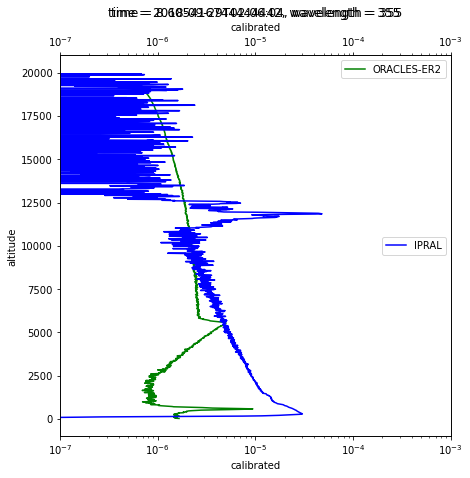

In [16]:
fig, ax = plt.subplots(figsize=(7,7))
limitez = (er2dataset['altitude'] < 20000)
(er2dataset['calibrated']/1e3).isel(time=250, wavelength=0, altitude=limitez).plot(y='altitude', ax=ax, xscale='log',
                                                                             label='ORACLES-ER2', color='g')
ax2 = ax.twiny()
limitez = (ipraldataset['range'] < 20000)
ipraldataset['calibrated'].isel(time=250, wavelength=0, range=limitez).plot(y='range', ax=ax2, xscale='log',
                                                                            label='IPRAL', color='b')
ax.set_xlim(1e-7, 1e-3)
ax2.set_xlim(1e-7, 1e-3)
ax.legend(loc='upper right')
ax2.legend(loc='center right')

In [33]:
## trouver l'angle zenith solaire
from pysolar.solar import *
import datetime


In [39]:
latitude = 42.206
longitude = -71.382


In [29]:
datetest = datetime.datetime(2016, 9, 12, 7, 53, 30, tzinfo=datetime.timezone.utc)
# datetime.datetime(2007, 2, 18, 15, 13, 1, 130320, tzinfo=datetime.timezone.utc)
get_azimuth(latitude, longitude, datetest)

55.982278979960654

In [30]:
datetest

datetime.datetime(2016, 9, 12, 7, 53, 30, tzinfo=datetime.timezone.utc)

In [69]:
import re
[re.split(' |-|:', '2016-09-12 07:55:12'), re.split(' |-|:', '2016-09-13 07:55:12')]
datetest = list(map(int, re.split(' |-|:', '2016-09-12 07:55:12')))

In [70]:
datetime.datetime(datetest[0], datetest[1], datetest[2], datetest[3], datetest[4], datetest[5], tzinfo=datetime.timezone.utc)

datetime.datetime(2016, 9, 12, 7, 55, 12, tzinfo=datetime.timezone.utc)

In [75]:
def get_solar_zenith(dateinput, lat, lon):
    date_split = re.split(' |-|:', dateinput)
    date_split_int = list(map(int, date_split))
    date_datetime = datetime.datetime(date_split_int[0], date_split_int[1], date_split_int[2], date_split_int[3], date_split_int[4], date_split_int[5], 
                                      tzinfo=datetime.timezone.utc)
    altitude = get_altitude(lat, lon, date_datetime)
    azimuth = get_azimuth(lat, lon, date_datetime)
    return altitude, azimuth

In [85]:
get_solar_zenith(str(er2dataset['time'].values[-1]), latitude, longitude)

(42.38156216900215, 134.75772615155557)

In [84]:
er2dataset['time'].values[-1]

'2016-09-12 14:34:40'